I compare the radio-to-optical offsets computed using Gaia DR2 and ICRF3 SX catalog and those using Rio survey (Assifin et al. 2013) and ICRF2 catalog. 

In [36]:
from astropy.table import Table, join
from matplotlib import pyplot as plt
import numpy as np

In [14]:
rio = Table.read("../data/rio-icrf2-offset.fits")
rio.rename_column("IERS", "iers_name")
rio = rio["iers_name", "dRA", "dDE", "sRA", "sDE", "Vmag",
          "X", "S", "P", "K", "R", "N"]

In [17]:
r2o = Table.read("../data/icrf3_sx_gaia_offset.fits")

r2o = r2o["iers_name", "ra_err_sx", "dec_err_sx", "pos_err_sx",
          "ra", "ra_err_g", "dec", "dec_err_g", "pos_err_g",
          "dra_sx", "ddec_sx", "dra_err_sx", "ddec_err_sx", "dra_ddec_cov_sx",
          "ang_sep_sx", "pa_sx", "nor_ra_sx", "nor_dec_sx", "nor_sep_sx",
          "dra_sx_ccl2", "ddec_sx_ccl2", "ang_sep_sx_ccl2", "pa_sx_ccl2",
          "nor_ra_sx_ccl2", "nor_dec_sx_ccl2", "nor_sep_sx_ccl2"]

In [18]:
join_tab = join(r2o, rio, keys="iers_name")

join_tab

iers_name,ra_err_sx,dec_err_sx,pos_err_sx,ra,ra_err_g,dec,dec_err_g,pos_err_g,dra_sx,ddec_sx,dra_err_sx,ddec_err_sx,dra_ddec_cov_sx,ang_sep_sx,pa_sx,nor_ra_sx,nor_dec_sx,nor_sep_sx,dra_sx_ccl2,ddec_sx_ccl2,ang_sep_sx_ccl2,pa_sx_ccl2,nor_ra_sx_ccl2,nor_dec_sx_ccl2,nor_sep_sx_ccl2,dRA,dDE,sRA,sDE,Vmag,X,S,P,K,R,N
,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,mas,,mas,deg,,,,mas,mas,,deg,,,,mas,mas,mas,mas,mag,,,,,,
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,int16,int16,float64,float64,float64,float64,float64,float64,float64
0002-478,0.06624331361080132,0.10759999999999999,0.1092520311826254,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,0.10483375797278259,-0.23259781301021573,0.3320253181609285,0.39662685632585176,-0.03068195001551304,0.25513106323580287,155.7385165198541,0.31574025304290493,-0.5864398976027061,0.6146810169726248,0.09847753654841823,-0.2816497650887939,0.2983695952660355,160.7280571243572,0.23650226345101594,-0.646060910252982,0.7228054286435159,23,-29,44,95,16.8,nan,nan,0.49,0.26,0.31,0.28
0003-066,0.030558773168077865,0.0314,0.03153349547988754,1.5578870064695536,0.09430468606721869,-6.39314865050367,0.062095265856561006,0.09842497204589487,0.04870482785710256,-0.21658679010272405,0.09913229762178775,0.06958291486993766,0.0021294087057234195,0.22199549072805835,167.32646542951596,0.4913113992668923,-3.112643247377057,3.4669232521357687,0.08725909501372613,-0.2313864173570624,0.2472929918132561,159.33783022787878,0.40503550127265,-3.525521012086116,3.8828591017899647,18,20,18,31,17.9,3.26,2.8,nan,nan,nan,nan
0007+106,0.03607787203439982,0.0385,0.039351348789675895,2.6291913864114305,0.07220077482853457,10.974862370062839,0.06707566002756404,0.0875928007083494,-0.4212826858664831,-0.23412622240925882,0.08071285360072013,0.07733947354445433,0.002665818833408445,0.4819690751806672,240.937052716043,-5.219524116326428,-3.0272538935073596,5.293647252558684,-0.3857272425524527,-0.24472179764532712,0.45680878263216346,237.60721757189287,-5.21390328367681,-3.436597387489477,4.937841544925132,18,-1,59,28,16.0,0.4,nan,0.84,0.24,0.12,0.8
0007+171,0.059829162913533455,0.07139999999999999,0.07205205798485564,2.641627872611432,0.0880838397806315,17.40521140333286,0.06745247810418324,0.09503344441519031,-0.9493477432582664,0.24350170519937817,0.10648141417840996,0.09822319890125406,0.0019998196756787195,0.9800786795276022,284.38587995785406,-8.915619224098876,2.4790651080726436,9.882135611403639,-0.9179398267286516,0.23269273092526613,0.9469738288464392,284.22453238771106,-8.879620372020858,2.1479789455709883,9.542916311328396,53,-87,33,80,17.2,4.16,1.08,0.65,0.19,0.61,0.1
0019+058,0.03266189244024434,0.033699999999999994,0.03420859850719023,5.6351718325254945,0.2820406941995518,6.134519066344285,0.15141127714993433,0.28888701503047226,-0.4320037715706657,0.2813605764373505,0.28392561068410715,0.1551162945927159,0.015321980470115902,0.5155492533448556,303.0758740769248,-1.5215385837500544,1.813868602109858,2.9260506487509974,-0.3952214290799844,0.2684971405713475,0.4777977527144881,304.19057137724405,-1.5310082821889597,1.6041795877515321,2.742355938198933,120,17,0,0,18.4,0.69,0.0,nan,nan,nan,nan
0047-579,0.0862245113988157,0.11599999999999999,0.11886030223559439,12.497804250097257,0.10166274422655572,-57.64092771405373,0.08128314053031524,0.10619599394684774,0.1499428027811036,-0.17500655644653304,0.13330408819551853,0.1416437394820928,2.2569952990886787e-05,0.23045637093629348,139.410563039597,1.1248177367312313,-1.2355403570000925,1.6718556641308218,0.14055885249721314,-0.24081348589814694,0.27883315083710963,149.7285968081916,0.9369610053470404,-1.4368868689043066,2.0016387625394505,54,-34,62,30,17.2,nan,nan,0.78,0.12,0.76,0.12
0048-097,0.030625528117379446,0.0313,0.03180174950258958,12.67215570209890

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2


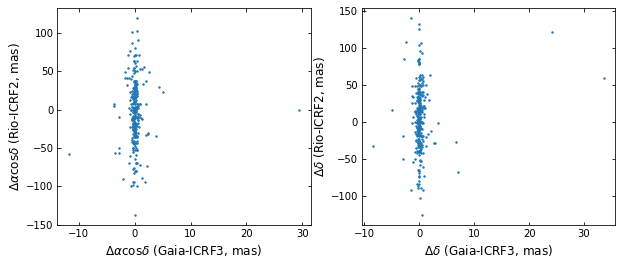

In [35]:
# Compare the position offset
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(-join_tab["dra_sx"], join_tab["dRA"], s=2)
ax1.scatter(-join_tab["ddec_sx"], join_tab["dDE"], s=2)

ax0.set_xlabel("$\Delta\\alpha\cos\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\Delta\\alpha\cos\delta$ (Rio-ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\Delta\delta$ (Gaia-ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\delta$ (Rio-ICRF2, mas)", fontsize=12)

plt.subplots_adjust()

Angular separation between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2


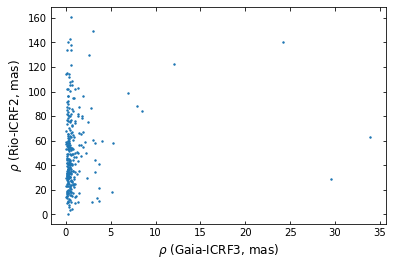

In [42]:
# Angular separation
dpos = np.sqrt(join_tab["dRA"]**2 + join_tab["dDE"]**2)

fig, ax = plt.subplots()
ax.scatter(join_tab["ang_sep_sx"], dpos, s=2)
ax.set_xlabel("$\\rho$ (Gaia-ICRF3, mas)", fontsize=12)
ax.set_ylabel("$\\rho$ (Rio-ICRF2, mas)", fontsize=12)

print("Angular separation between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2")

Obviously, radio-to-optical offsets calculated from Rio survey and ICRF2 catalog is significantly greater than those from Gaia and ICRF3 catalog.

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2


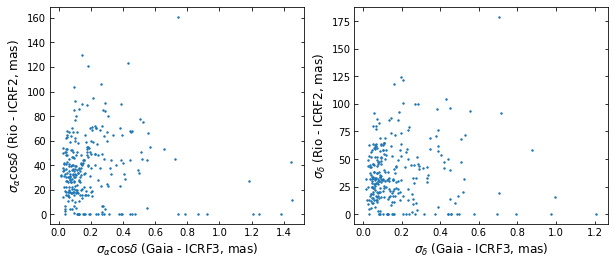

In [45]:
# Compare the position error
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(join_tab["ra_err_g"], join_tab["sRA"], s=2)
ax1.scatter(join_tab["dec_err_g"], join_tab["sDE"], s=2)

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\sigma_\\alpha\cos\delta$ (Rio - ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\sigma_\delta$ (Gaia - ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\sigma_\delta$ (Rio - ICRF2, mas)", fontsize=12)

plt.subplots_adjust()

The cause of this discrepancy is most likely due to systematic errors in the Rio position, which is similar to those reported by Mignard.